In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

df = pd.read_csv("./dataForVisualizaiton.csv")
df.head()

,category_list,funding_total_usd,country_code,funding_rounds,label,Num_of_investor,funding_duration,first_funding_at_UTC,last_funding_at_UTC
0,curatedweb,2000000.0,CHN,1,0,1.0,0.0,13957.0,13957
1,games,41250.0,HKG,1,0,1.0,0.0,16252.0,16252
2,analytics,33600000.0,USA,4,0,14.0,1040.0,15708.0,16748
3,mobile,1150050.0,USA,3,0,13.0,931.0,15175.0,16106
4,e-commerce,40000.0,CHL,1,0,1.0,0.0,15754.0,15754


In [2]:
from sklearn.utils import resample, shuffle

# Separate majority and minority classes
df_majority = df[df.label==0]
df_minority = df[df.label==1]

# n is the number of majority class (label = 0)
n = df.label.value_counts()[1]
print(n)

# downsample majority class
df_majority_downsampled = resample(df_majority, replace=False, n_samples=n, random_state=123)

df_downsampled = pd.concat([df_minority, df_majority_downsampled])
print(df_downsampled.shape)

df = df_downsampled
df.head()

4903
(9806, 9)


,category_list,funding_total_usd,country_code,funding_rounds,label,Num_of_investor,funding_duration,first_funding_at_UTC,last_funding_at_UTC
5,apps cable distribution software,5000000.0,USA,1,1,1.0,0.0,16511.0,16511
7,art e-commerce marketplaces,500000.0,USA,1,1,3.0,0.0,14379.0,14379
8,curatedweb,2535000.0,USA,2,1,13.0,411.0,14610.0,15021
16,analytics,1250000.0,USA,2,1,4.0,28.0,15280.0,15308
17,software,35000000.0,USA,1,1,1.0,0.0,14676.0,14676


In [3]:
df = df.reset_index(drop=True)
df.head()
print(df.shape)
print(df[df.label == 0].shape)

(9806, 9)
(4903, 9)


In [4]:
df['label'] = df['label'].astype(str)
df['label'] = df['label'].str.replace('0', 'fail')
df['label'] = df['label'].str.replace('1', 'success')
df.head()

,category_list,funding_total_usd,country_code,funding_rounds,label,Num_of_investor,funding_duration,first_funding_at_UTC,last_funding_at_UTC
0,apps cable distribution software,5000000.0,USA,1,success,1.0,0.0,16511.0,16511
1,art e-commerce marketplaces,500000.0,USA,1,success,3.0,0.0,14379.0,14379
2,curatedweb,2535000.0,USA,2,success,13.0,411.0,14610.0,15021
3,analytics,1250000.0,USA,2,success,4.0,28.0,15280.0,15308
4,software,35000000.0,USA,1,success,1.0,0.0,14676.0,14676


In [5]:
df.dtypes

category_list            object
funding_total_usd       float64
country_code             object
funding_rounds            int64
label                    object
Num_of_investor         float64
funding_duration        float64
first_funding_at_UTC    float64
last_funding_at_UTC       int64
dtype: object

In [6]:
# Identify Numeric features
numeric_features = ['funding_total_usd','funding_rounds','Num_of_investor','funding_duration','first_funding_at_UTC','last_funding_at_UTC']

# Identify Categorical features
cat_features = ['category_list','country_code','label']

In [7]:
import scipy.stats as ss
from collections import Counter
import math 
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np

def convert(data, to):
    converted = None
    if to == 'array':
        if isinstance(data, np.ndarray):
            converted = data
        elif isinstance(data, pd.Series):
            converted = data.values
        elif isinstance(data, list):
            converted = np.array(data)
        elif isinstance(data, pd.DataFrame):
            converted = data.as_matrix()
    elif to == 'list':
        if isinstance(data, list):
            converted = data
        elif isinstance(data, pd.Series):
            converted = data.values.tolist()
        elif isinstance(data, np.ndarray):
            converted = data.tolist()
    elif to == 'dataframe':
        if isinstance(data, pd.DataFrame):
            converted = data
        elif isinstance(data, np.ndarray):
            converted = pd.DataFrame(data)
    else:
        raise ValueError("Unknown data conversion: {}".format(to))
    if converted is None:
        raise TypeError('cannot handle data conversion of type: {} to {}'.format(type(data),to))
    else:
        return converted
    
def conditional_entropy(x, y):
    y_counter = Counter(y)
    xy_counter = Counter(list(zip(x,y)))
    total_occurrences = sum(y_counter.values())
    entropy = 0.0
    for xy in xy_counter.keys():
        p_xy = xy_counter[xy] / total_occurrences
        p_y = y_counter[xy[1]] / total_occurrences
        entropy += p_xy * math.log(p_y/p_xy)
    return entropy

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

def theils_u(x, y):
    s_xy = conditional_entropy(x,y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n/total_occurrences, x_counter.values()))
    s_x = ss.entropy(p_x)
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x

def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0,cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = numerator/denominator
    return eta
    
def associations(dataset, nominal_columns=None, mark_columns=False, theil_u=False, plot=True, return_results = False, **kwargs):
    dataset = convert(dataset, 'dataframe')
    columns = dataset.columns
    if nominal_columns is None:
        nominal_columns = list()
    elif nominal_columns == 'all':
        nominal_columns = columns
    corr = pd.DataFrame(index=columns, columns=columns)
    for i in range(0,len(columns)):
        for j in range(i,len(columns)):
            if i == j:
                corr[columns[i]][columns[j]] = 1.0
            else:
                if columns[i] in nominal_columns:
                    if columns[j] in nominal_columns:
                        if theil_u:
                            corr[columns[j]][columns[i]] = theils_u(dataset[columns[i]],dataset[columns[j]])
                            corr[columns[i]][columns[j]] = theils_u(dataset[columns[j]],dataset[columns[i]])
                        else:
                            cell = cramers_v(dataset[columns[i]],dataset[columns[j]])
                            corr[columns[i]][columns[j]] = cell
                            corr[columns[j]][columns[i]] = cell
                    else:
                        cell = correlation_ratio(dataset[columns[i]], dataset[columns[j]])
                        corr[columns[i]][columns[j]] = cell
                        corr[columns[j]][columns[i]] = cell
                else:
                    if columns[j] in nominal_columns:
                        cell = correlation_ratio(dataset[columns[j]], dataset[columns[i]])
                        corr[columns[i]][columns[j]] = cell
                        corr[columns[j]][columns[i]] = cell
                    else:
                        cell, _ = ss.pearsonr(dataset[columns[i]], dataset[columns[j]])
                        corr[columns[i]][columns[j]] = cell
                        corr[columns[j]][columns[i]] = cell
    corr.fillna(value=np.nan, inplace=True)
    if mark_columns:
        marked_columns = ['{} (nom)'.format(col) if col in nominal_columns else '{} (con)'.format(col) for col in columns]
        corr.columns = marked_columns
        corr.index = marked_columns
    if plot:
        plt.figure(figsize=(20,20))#kwargs.get('figsize',None))
        sns.heatmap(corr, annot=kwargs.get('annot',True), fmt=kwargs.get('fmt','.2f'), cmap='coolwarm')
        plt.show()
    if return_results:
        return corr

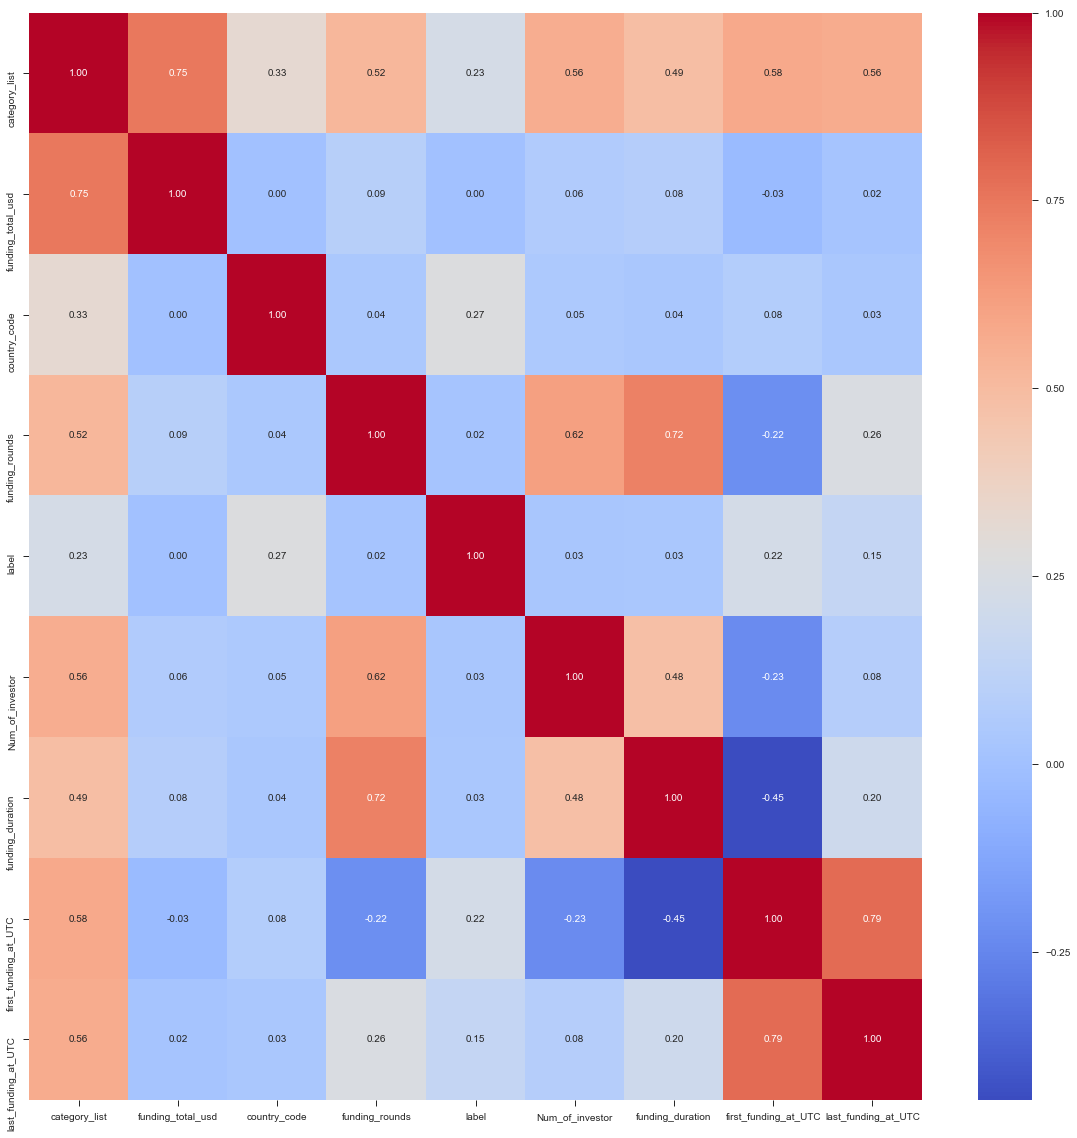

In [8]:
results = associations(df,nominal_columns=cat_features,return_results=True)


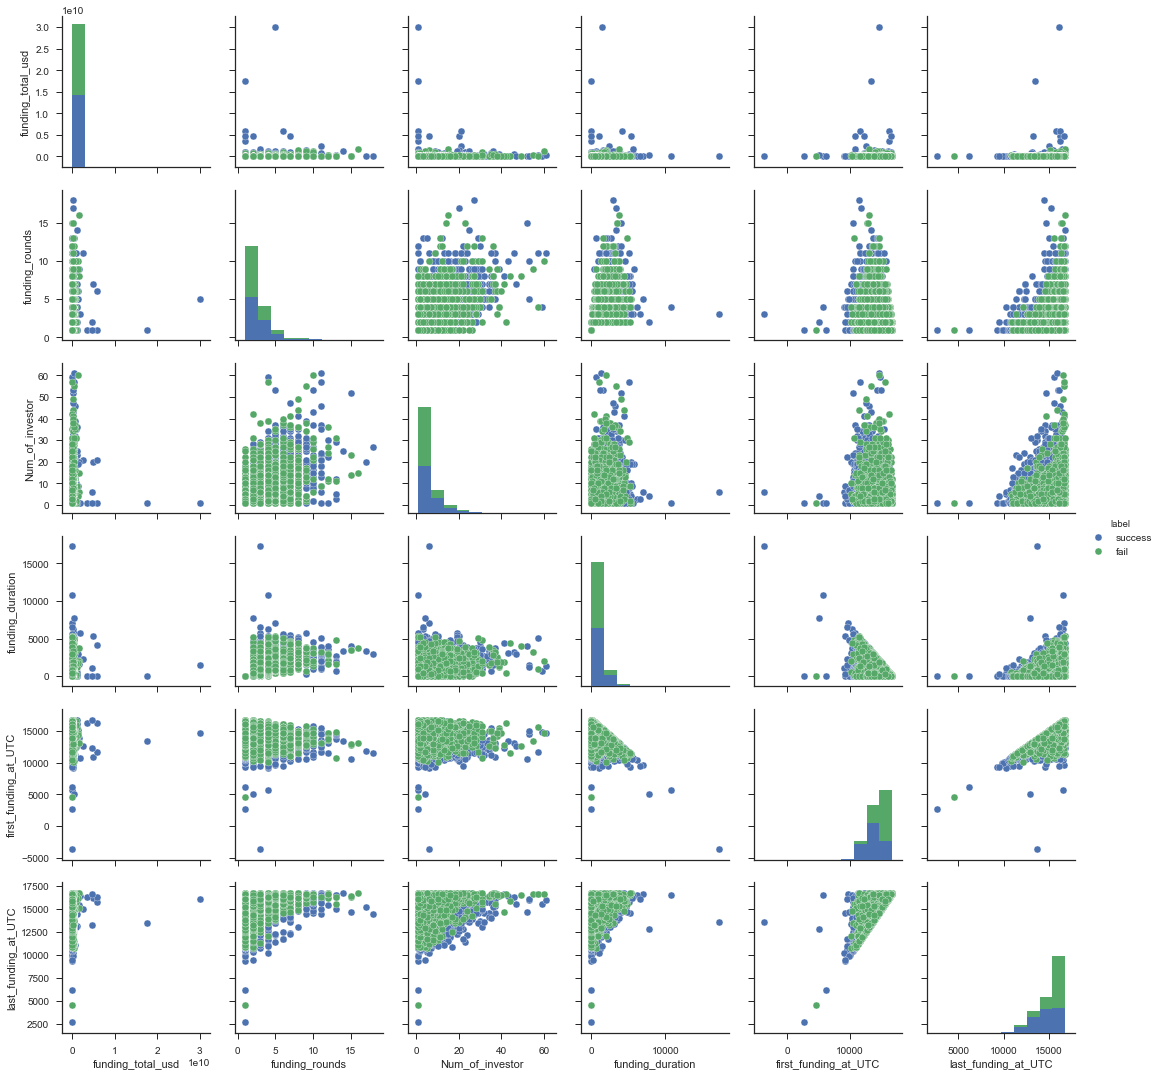

In [9]:
g = sns.pairplot(df[['funding_total_usd','funding_rounds','Num_of_investor','funding_duration','first_funding_at_UTC','last_funding_at_UTC','label']], hue = 'label')


In [15]:
newdf = df.sample(frac=0.2)
print(newdf.shape)
print(newdf[newdf.label == 'fail'].shape)

(1961, 9)
(980, 9)


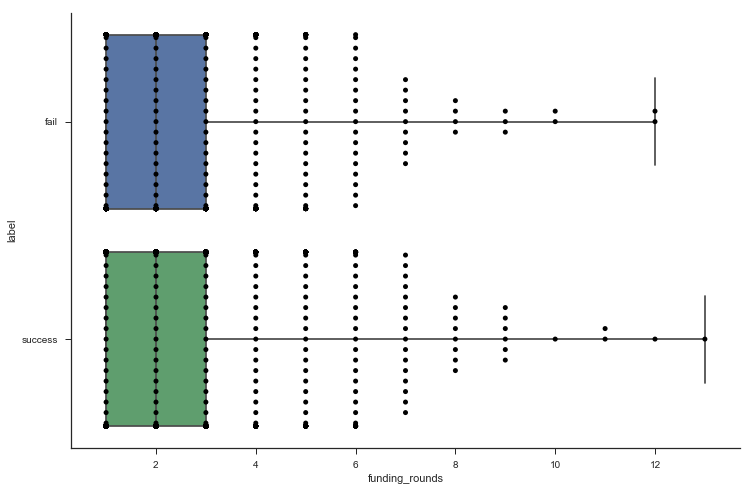

In [11]:
g = sns.boxplot(y = 'label',
              x = 'funding_rounds',
              data = newdf, whis=np.inf)
g = sns.swarmplot(y = 'label',
              x = 'funding_rounds', 
              data = newdf,
              # Decrease the size of the points to avoid crowding 
              size = 5,color = 'black')
# remove the top and right line in graph
sns.despine()
g.figure.set_size_inches(12,8)
plt.show()

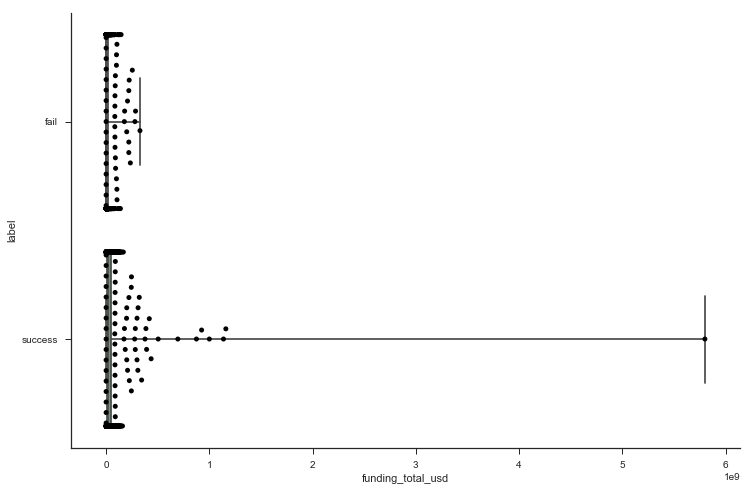

In [12]:
g = sns.boxplot(y = 'label',
              x = 'funding_total_usd',
              data = newdf, whis=np.inf)
g = sns.swarmplot(y = 'label',
              x = 'funding_total_usd', 
              data = newdf,
              # Decrease the size of the points to avoid crowding 
              size = 5,color = 'black')
# remove the top and right line in graph
sns.despine()
g.figure.set_size_inches(12,8)
plt.show()

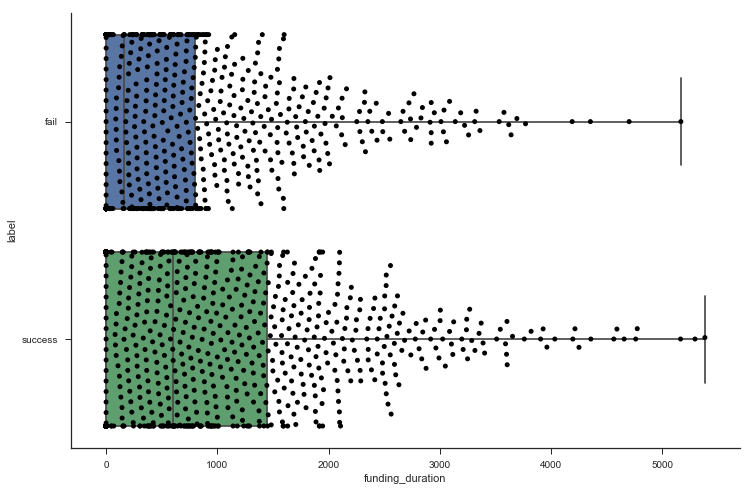

In [13]:
g = sns.boxplot(y = 'label',
              x = 'funding_duration',
              data = newdf, whis=np.inf)
g = sns.swarmplot(y = 'label',
              x = 'funding_duration', 
              data = newdf,
              # Decrease the size of the points to avoid crowding 
              size = 5,color = 'black')
# remove the top and right line in graph
sns.despine()
g.figure.set_size_inches(12,8)
plt.show()

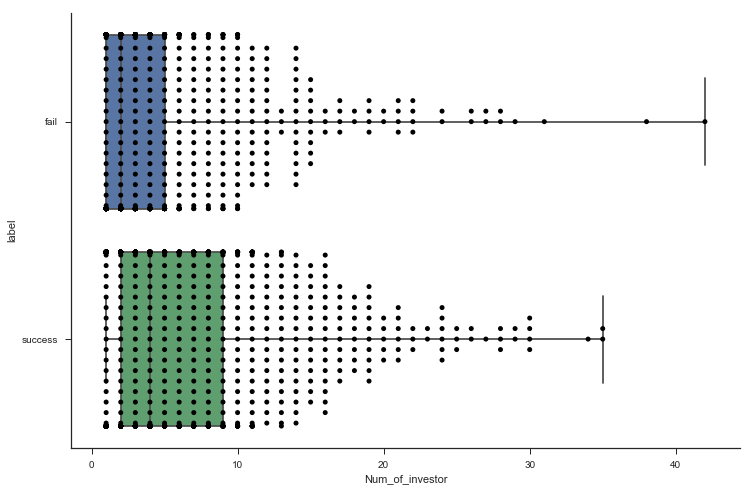

In [14]:
g = sns.boxplot(y = 'label',
              x = 'Num_of_investor',
              data = newdf, whis=np.inf)
g = sns.swarmplot(y = 'label',
              x = 'Num_of_investor', 
              data = newdf,
              # Decrease the size of the points to avoid crowding 
              size = 5,color = 'black')
# remove the top and right line in graph
sns.despine()
g.figure.set_size_inches(12,8)
plt.show()